# Euclidean Projection onto Unit Balls and Spheres

In this notebook we provide examples of projecting points onto unit $L_p$ balls and spheres by solving the following constrained optimization problems

$$
\begin{array}{lll}
    y \in & \text{argmin}_u & \frac{1}{2} \|u - x\|^2 \\
    & \text{subject to} & \|u\|_p \leq 1
\end{array}
$$
and
$$
\begin{array}{lll}
    y \in & \text{argmin}_u & \frac{1}{2} \|u - x\|^2 \\
    & \text{subject to} & \|u\|_p = 1
\end{array}
$$
respectively. We consider three balls $p = 1, 2$ and $\infty$.


In [1]:
import numpy as np


def insideBall(x, p=2):
    """Returns true if point x is inside a unit Lp ball."""
    return np.linalg.norm(x, p) <= 1.0


def euclideanProjection(x, p=2):
    """Projects the point x onto the unit Lp sphere."""
    if (p == 1):
        mu = np.sort(np.abs(x))[::-1]
        mu_sum = mu.cumsum()
        rho = np.max([j for j in range(len(mu)) if ((j + 1) * mu[j] > mu_sum[j] - 1.0)])
        theta = (mu_sum[rho] - 1.0) / (rho + 1)
        w = np.maximum(np.abs(x) - theta, 0.0)
        return w * [1.0 if xi >= 0 else -1.0 for xi in x]
    if (p == 2):
        return x / np.sqrt(np.dot(x, x))
    if (p == np.inf):
        w = np.minimum(np.maximum(x, -1.0), 1.0)
        if np.all(np.abs(w) < 1.0):
            rho = np.argmin(1.0 - np.abs(w))
            w[rho] = np.sign(w[rho])
        return w
    
    assert False, "unrecognized p={}".format(p)
    return None


We now animate projection onto different unit spheres as a function of $x$ for the 2-dimensional point $(x, 0.5)$.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML


x = np.linspace(-3.0, 3.0, num=101)
y_1, y_2, y_inf = [], [], []

for xi in x:
    y_1.append(euclideanProjection([xi, 0.5], 1))
    y_2.append(euclideanProjection([xi, 0.5], 2))
    y_inf.append(euclideanProjection([xi, 0.5], np.inf))

    
def animate(fnum, x, y_1, y_2, y_inf):

    # draw balls
    ax.clear()
    ax.plot([0.0, 1.0, 0.0, -1.0, 0.0], [1.0, 0.0, -1.0, 0.0, 1.0], 'r', linewidth=1)
    ax.plot(np.cos(np.linspace(0.0, 2.0 * np.pi)), np.sin(np.linspace(0.0, 2.0 * np.pi)), 'b', linewidth=1)
    ax.plot([-1.0, 1.0, 1.0, -1.0, -1.0], [1.0, 1.0, -1.0, -1.0, 1.0], 'g', linewidth=1)
    
    # draw path for x
    ax.plot([x[0], x[-1]], [0.5, 0.5], 'k--')
    ax.plot(x[fnum], 0.5, 'ko')
    
    # draw projection
    ax.plot(y_1[fnum][0], y_1[fnum][1], 'ro')
    ax.plot(y_2[fnum][0], y_2[fnum][1], 'bo')
    ax.plot(y_inf[fnum][0], y_inf[fnum][1], 'go')
    
    ax.set_xlim(x[0], x[-1]); ax.set_ylim(x[0], x[-1])
    ax.axis('equal')
    return (ax,)


fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ani = animation.FuncAnimation(fig, animate, init_func=None, fargs=(x, y_1, y_2, y_inf),
                              interval=100, frames=len(x), blit=False, repeat=False)
plt.close(fig)

#HTML(ani.to_jshtml())
HTML(ani.to_html5_video())

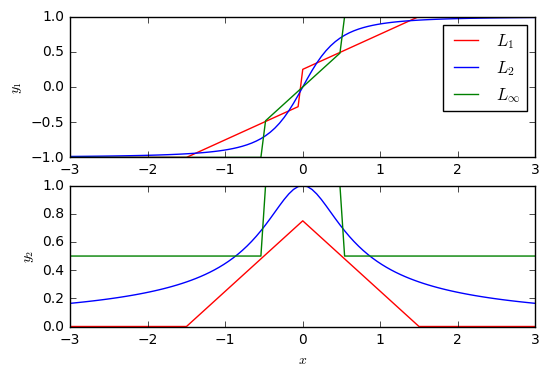

In [3]:
plt.figure()

plt.subplot(2, 1, 1)
plt.plot(x, [yi[0] for yi in y_1], 'r')
plt.plot(x, [yi[0] for yi in y_2], 'b')
plt.plot(x, [yi[0] for yi in y_inf], 'g')
plt.ylabel(r"$y_1$"); plt.legend([r"$L_1$", r"$L_2$", r"$L_\infty$"])

plt.subplot(2, 1, 2)
plt.plot(x, [yi[1] for yi in y_1], 'r')
plt.plot(x, [yi[1] for yi in y_2], 'b')
plt.plot(x, [yi[1] for yi in y_inf], 'g')
plt.xlabel(r"$x$"); plt.ylabel(r"$y_2$")
